<a href="https://www.kaggle.com/rinichristy/titanic-survival-prediction?scriptVersionId=89312639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival Prediction Using Mutiple Classifiers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_train= pd.read_csv('../input/titanic/train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Exploratory Data Analysis (EDA) of Taining set**

In [3]:
titanic_train.shape

(891, 12)

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## **Missing Data**

In [7]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

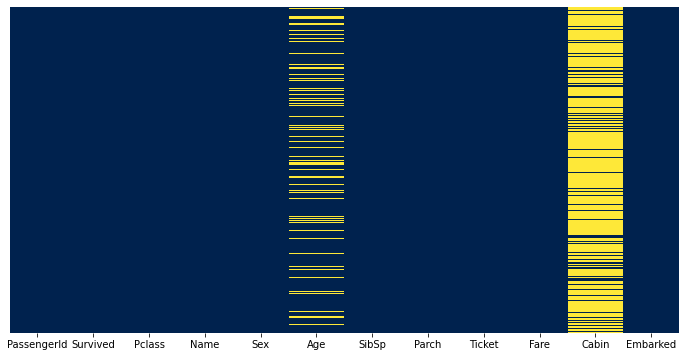

In [8]:
plt.figure(figsize =(12,6))
sns.heatmap(titanic_train.isnull(), yticklabels = False, cbar = False, cmap ='cividis'); 

Cabin column contains too many of missing data to do something useful with it. So its better to drop it. 

## **Data Cleaning**

### **Filling age column:**

Its seem better to fill the age column with the mean age per passenger class. 

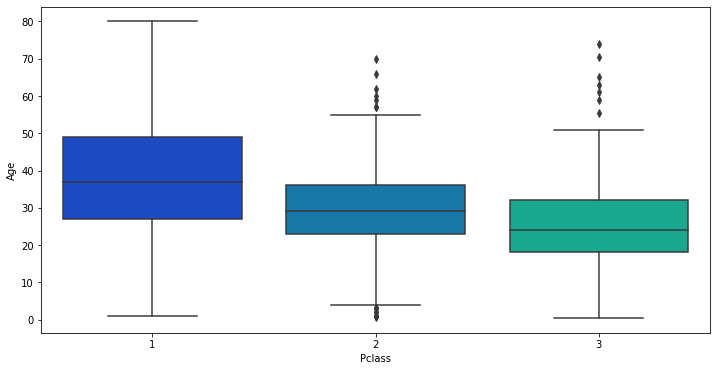

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass',y='Age',data=titanic_train,palette='winter');

In [10]:
titanic_train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Define a function for filling age based on these mean Age per Pclass

In [11]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

Applying fill_age function

In [12]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply (fill_age, axis = 1)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check Heatmap again

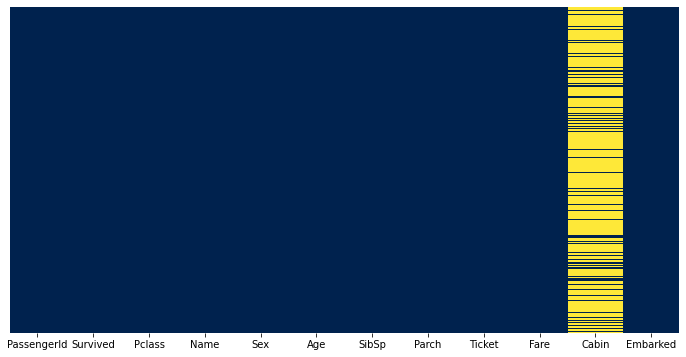

In [13]:
plt.figure(figsize =(12,6))
sns.heatmap(titanic_train.isnull(), yticklabels = False, cbar = False, cmap ='cividis');

In [14]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarked column contain 2 missing values. Better drop those two rows.  Cabin column can be deleted completely. 

In [15]:
titanic_train.drop('Cabin', axis =1, inplace = True)

In [16]:
#Dropping missing embarked rows
titanic_train.dropna(inplace = True)

In [17]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No missing values left. 

### **Feature engineering of Name column**

In [19]:
titanic_train['Name'][0].split(', ')[1].split('.')[0]

'Mr'

In [20]:
titanic_train['First_name'] = titanic_train['Name'].apply(lambda x: x.split(', ')[1])
titanic_train['First_name'] = titanic_train['First_name'].apply(lambda x:x.split('.')[0])
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [21]:
titanic_train['First_name'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: First_name, dtype: int64

## **Data Visualization**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


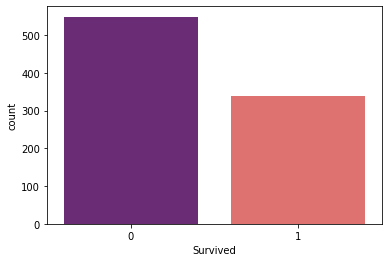

In [22]:
sns.countplot(titanic_train['Survived'], palette = 'magma');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


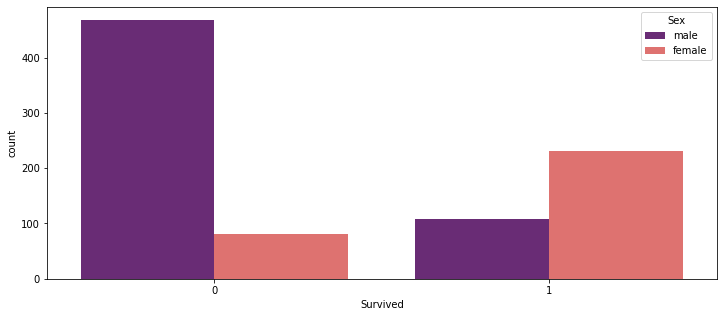

In [23]:
plt.figure(figsize = (12,5))
sns.countplot(titanic_train['Survived'], hue = titanic_train['Sex'],  palette = 'magma');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


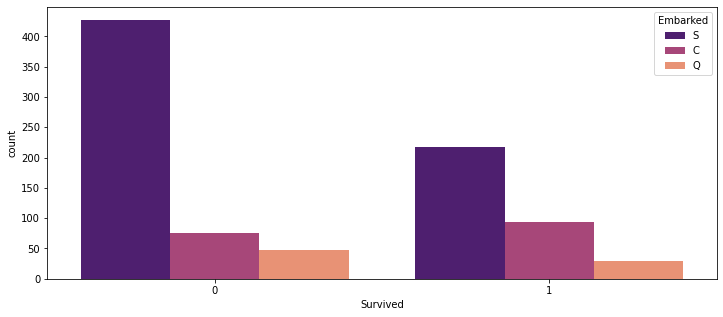

In [24]:
plt.figure(figsize = (12,5))
sns.countplot(titanic_train['Survived'], hue = titanic_train['Embarked'],  palette = 'magma');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


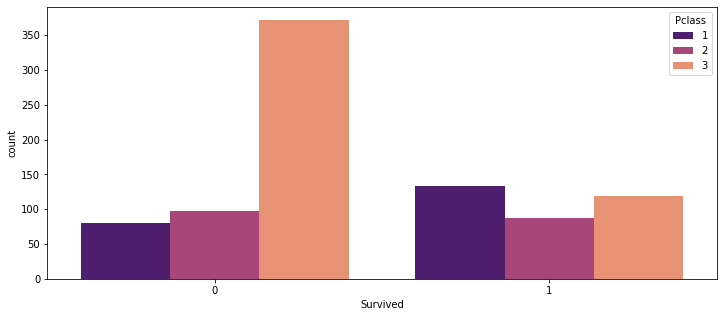

In [25]:
plt.figure(figsize = (12,5))
sns.countplot(titanic_train['Survived'], hue = titanic_train['Pclass'],  palette = 'magma');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


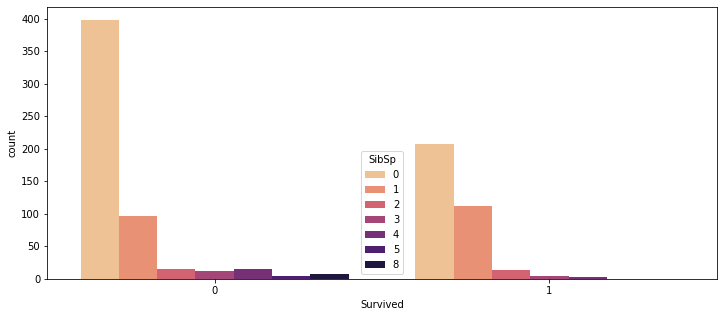

In [26]:
plt.figure(figsize = (12,5))
sns.countplot(titanic_train['Survived'], hue = titanic_train['SibSp'],  palette = 'magma_r');

## **Convert Categorical features into dummy variables**

In [27]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  First_name   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.6+ KB


Sex, Embarked, First name can be converted to dummy variables. Name, Ticket are to be dropped. 

In [28]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first = True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first = True)
firstname = pd.get_dummies(titanic_train['First_name'], drop_first = True)
titanic_train = pd.concat([titanic_train, sex, embark, firstname], axis =1)
titanic_train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'First_name'], axis = 1, inplace = True)
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


## **Exploratory Data Analysis (EDA) of Testing set**

In [29]:
titanic_test = pd.read_csv('../input/titanic/test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
titanic_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [33]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Fare column contains 1 missing data. Before dealing with age and vanim column. this needs to be filled in. Checking mean Fare per Passenger class gives an idea about the missing value. 

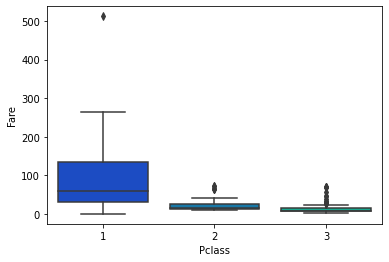

In [34]:
sns.boxplot(x='Pclass',y='Fare',data=titanic_test,palette='winter');

Find which class the missing value lies in.

In [35]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


The missing value lies in Pclass 3. Find the mean value of Fares in each class.

In [36]:
titanic_test.groupby('Pclass').mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297
2,1117.935484,28.777500,0.376344,0.344086,22.202104
3,1094.178899,24.027945,0.463303,0.417431,12.459678


Fill the missing value with the mean Fare of Pclass 3.

In [37]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(value = 12.459678) 

In [38]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


The missing Fare value is filled in. 

### **Feature engineering of Name column of Test data set.**

In [39]:
titanic_test['First_name'] = titanic_test['Name'].apply(lambda x: x.split(', ')[1])
titanic_test['First_name'] = titanic_test['First_name'].apply(lambda x:x.split('.')[0])
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [40]:
titanic_test['First_name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: First_name, dtype: int64

In [41]:
titanic_test['First_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

Filling Age missing values and getting dummy values for 'Sex', 'Embarked' and 'First_name'. 'Name; 'Cabin' and 'Ticket' are to be dropped.

In [42]:
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(fill_age,axis=1)
sex = pd.get_dummies(titanic_test['Sex'], drop_first = True)
embark = pd.get_dummies(titanic_test['Embarked'], drop_first = True)
firstname = pd.get_dummies(titanic_test['First_name'], drop_first = True)
titanic_test = pd.concat([titanic_test, sex, embark, firstname], axis =1)
titanic_test.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'First_name', ], axis = 1, inplace = True)
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
0,892,3,34.5,0,0,7.8292,1,1,0,0,0,0,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,1,1,0,0,0,0,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,1,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,1,0,0


In [43]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'],
      dtype='object')

In [44]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'],
      dtype='object')

Compared to titanic_train set, titanic_test set does not contain 'Jonkheer', 'Lady', 'Major','Mlle', 'Mme',  'Sir', 'the Countess', 'Col'. Its better to drop those dummy variables from titanic_train. The Don variable can be renamed to Dona, which is present in titanic testset. 

In [45]:
titanic_train.drop(['Jonkheer', 'Lady', 'Major','Mlle', 'Mme', 'Sir', 'the Countess', 'Col'], axis =1, inplace = True)

In [46]:
titanic_train.rename(columns ={'Don': 'Dona'}, inplace = True)

In [47]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,1,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,1,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,1,0,0,0


In [48]:
titanic_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
0,892,3,34.5,0,0,7.8292,1,1,0,0,0,0,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,0,0,0,1,0,0
2,894,2,62.0,0,0,9.6875,1,1,0,0,0,0,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,0,0,1,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,0,0,0,1,0,0


In [49]:
titanic_train.shape

(889, 18)

In [50]:
titanic_test.shape

(418, 17)

The data is ready to develop classification model It looks perfect to continue to classification process. Only 'Survived' column is missing in titanic_test.

## **Building a Logistic Regression Classification model**

### **Train Test Split**

Splitting the titanic_train data into test and train. 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop('Survived',axis=1), titanic_train['Survived'], test_size=0.30, random_state=101)

### **Training and predicting**

In [52]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter =10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [53]:
predictions = logmodel.predict(X_test)

### **Model Evaluation**

In [54]:
from sklearn.metrics import accuracy_score
print('Accuracy of the Logistic Regression Model is ', accuracy_score(y_test,predictions))

Accuracy of the Logistic Regression Model is  0.8539325842696629


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       163
           1       0.88      0.72      0.79       104

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.85      0.85       267



## **Building a Support Vector Classifier(SVC) Model**

In [56]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train,y_train)
predictions = svcmodel.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of the SVC Model is ', accuracy_score(y_test,predictions))
print('\n', '\n','Confusion Matrix of SVC Model:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report for SVC Model:' '\n',classification_report(y_test,predictions))

Accuracy of the SVC Model is  0.6329588014981273

 
 Confusion Matrix of SVC Model:
 [[161   2]
 [ 96   8]]

 
 Classification Report for SVC Model:
               precision    recall  f1-score   support

           0       0.63      0.99      0.77       163
           1       0.80      0.08      0.14       104

    accuracy                           0.63       267
   macro avg       0.71      0.53      0.45       267
weighted avg       0.69      0.63      0.52       267



### **Building a Decision Tree Classifier Model**

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
#Predictions and Evaluation of Decision Tree
predictions = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of the DecisionTreeClassifier Model is ', accuracy_score(y_test,predictions))
print('\n', '\n','Confusion Matrix of DecisionTreeClassifier Model:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report for DecisionTreeClassifier Model:' '\n',classification_report(y_test,predictions))

Accuracy of the DecisionTreeClassifier Model is  0.7640449438202247

 
 Confusion Matrix of DecisionTreeClassifier Model:
 [[138  25]
 [ 38  66]]

 
 Classification Report for DecisionTreeClassifier Model:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       163
           1       0.73      0.63      0.68       104

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267



## **Building a Random Forest Classifier Model**

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of the RandomForestClassifier Model is ', accuracy_score(y_test,predictions))
print('\n', '\n','Confusion Matrix of RandomForestClassifier :' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report for RandomForestClassifier:' '\n',classification_report(y_test,predictions))

Accuracy of the RandomForestClassifier Model is  0.846441947565543

 
 Confusion Matrix of RandomForestClassifier :
 [[149  14]
 [ 27  77]]

 
 Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.85      0.74      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.83       267
weighted avg       0.85      0.85      0.84       267



## **Building a Logistic Binary Regression Classification Model using Artificial Neural Network**

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )


2022-03-05 01:36:08.210326: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-05 01:36:08.325136: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
3/3 [==============================] - 1s 89ms/step - loss: 0.7334 - val_loss: 0.6611
Epoch 2/25
3/3 [==============================] - 0s 18ms/step - loss: 0.6859 - val_loss: 0.6149
Epoch 3/25
3/3 [==============================] - 0s 17ms/step - loss: 0.6312 - val_loss: 0.5814
Epoch 4/25
3/3 [==============================] - 0s 18ms/step - loss: 0.5999 - val_loss: 0.5507
Epoch 5/25
3/3 [==============================] - 0s 19ms/step - loss: 0.5723 - val_loss: 0.5276
Epoch 6/25
3/3 [==============================] - 0s 37ms/step - loss: 0.5541 - val_loss: 0.5083
Epoch 7/25
3/3 [==============================] - 0s 22ms/step - loss: 0.5464 - val_loss: 0.4911
Epoch 8/25
3/3 [==============================] - 0s 31ms/step - loss: 0.5266 - val_loss: 0.4776
Epoch 9/25
3/3 [==============================] - 0s 20ms/step - loss: 0.5148 - val_loss: 0.4673
Epoch 10/25
3/3 [==============================] - 0s 18ms/step - loss: 0.4972 - val_loss: 0.4568
Epoch 11/25
3/3 [============

<AxesSubplot:>

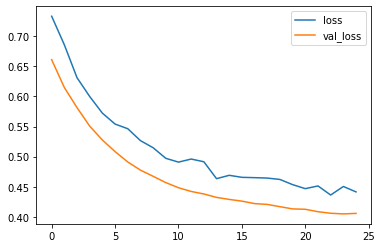

In [60]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [61]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of the ANN Model is ', accuracy_score(y_test,predictions))
print('\n', '\n','Confusion Matrix of ANN Model:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report for ANN Model:' '\n',classification_report(y_test,predictions))

Accuracy of the ANN Model is  0.846441947565543

 
 Confusion Matrix of ANN Model:
 [[151  12]
 [ 29  75]]

 
 Classification Report for ANN Model:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       163
           1       0.86      0.72      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



## **Final Output**

The best accuracy, precision and f1-score is obtained for Logistic Regression Classification model. Predicting the survival rate using this model and saving it as submission.csv file. 

In [62]:
submission_preds = logmodel.predict(titanic_test)
test_ids = titanic_test['PassengerId']
df = pd.DataFrame({'PassengerId': test_ids.values, 'Survived': submission_preds})
df.to_csv('submission.csv', index = False)